In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display_markdown
from scipy.stats import linregress
import random
import numpy as np
import seaborn as sns

In [2]:
# https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete

In [3]:
#Bank Churners
bank_churners = pd.read_csv("BankChurners.csv")
bank_churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
# Drop unneccesary columns
del bank_churners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]



In [5]:
del bank_churners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
bank_churners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


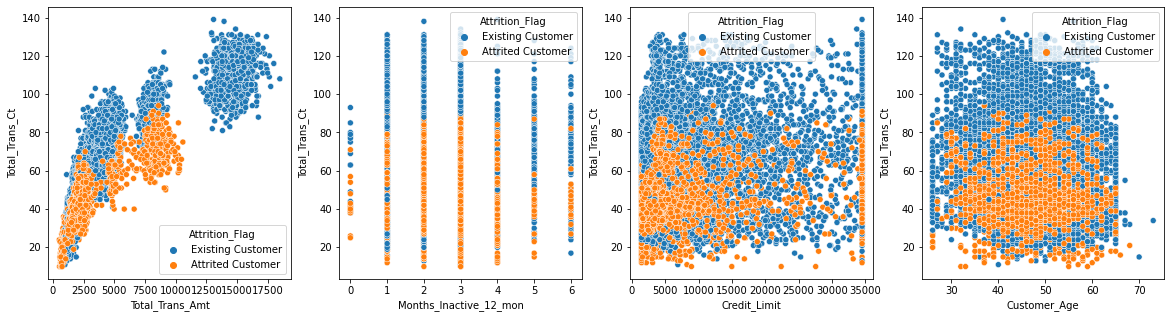

In [6]:
#Conlusion from the grapps below:
#Total_Trans_Ct:
    #Customers that spend more money, are more likely to remain.
#Months_Inactive_12_mon:
    #Customers are more likely to leave. have 2 to 3 months of inactivities. 
#Credit Limit:
    #Customer with higher credit limit more likely to remain.
#Customer_Age:
    #Almost all churned customers used their cards below 100 times.

df_frequency=pd.concat([bank_churners['Customer_Age'], bank_churners['Total_Trans_Ct'], bank_churners['Total_Trans_Amt'], bank_churners['Months_Inactive_12_mon'], bank_churners['Credit_Limit'], bank_churners['Attrition_Flag']],axis=1)
fig,ax=plt.subplots(ncols=4,figsize=(20,5))
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Total_Trans_Amt",hue="Attrition_Flag",ax=ax[0])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Months_Inactive_12_mon",hue="Attrition_Flag",ax=ax[1])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Credit_Limit",hue="Attrition_Flag",ax=ax[2])
_scat=sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Customer_Age",hue="Attrition_Flag",ax=ax[3])

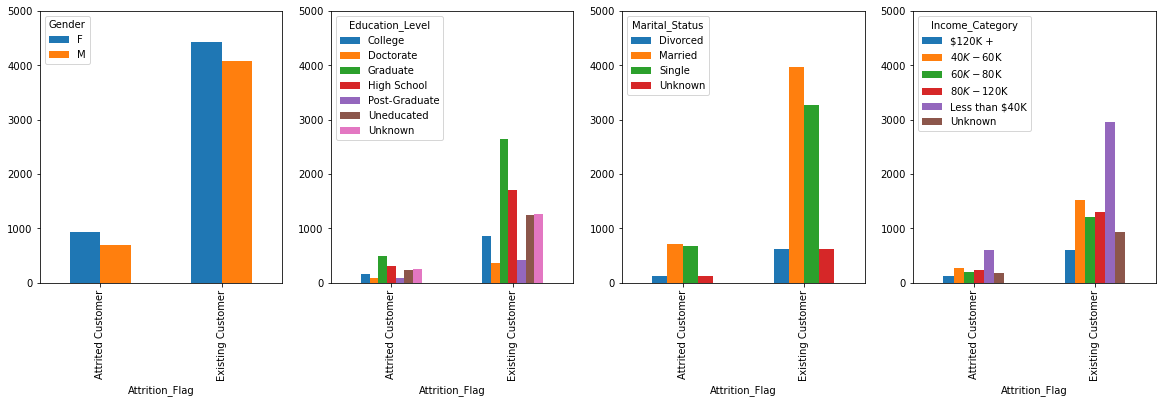

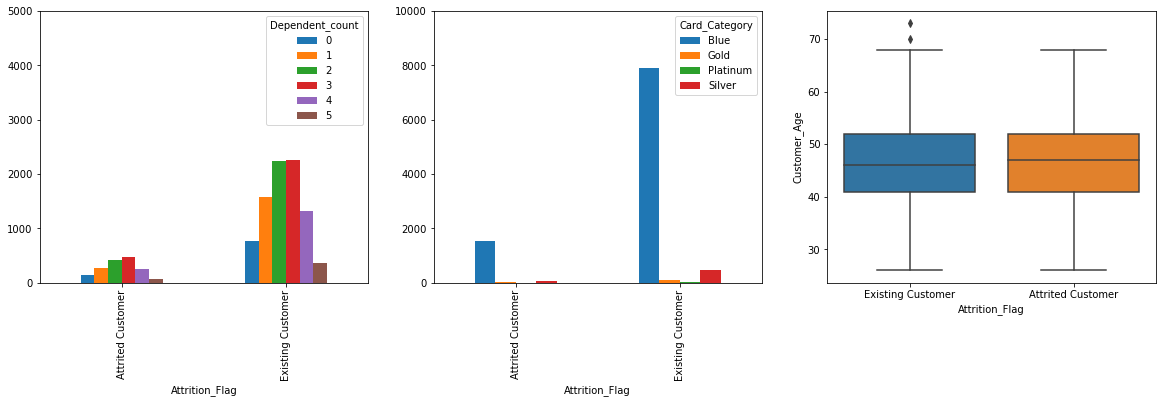

In [7]:
df_demographic=pd.concat([bank_churners['Customer_Age'],bank_churners['Gender'], bank_churners['Education_Level'],bank_churners['Marital_Status'],bank_churners['Income_Category'],bank_churners['Attrition_Flag']],axis=1)

fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(bank_churners['Attrition_Flag'],bank_churners['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(bank_churners['Attrition_Flag'],bank_churners['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(bank_churners['Attrition_Flag'],bank_churners['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(bank_churners['Attrition_Flag'],bank_churners['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(bank_churners['Attrition_Flag'],bank_churners['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(bank_churners['Attrition_Flag'],bank_churners['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box=sns.boxplot(data = df_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)

In [8]:
# Identify incomplete rows
bank_churners.count()

CLIENTNUM                   10127
Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

In [9]:
bank_churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
# Summary Statistics for Churners
churners = bank_churners.loc[bank_churners["Attrition_Flag"]=="Attrited Customer"]
churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [11]:
# Summary Statistics for Existing Customers
content = bank_churners.loc[bank_churners["Attrition_Flag"]=="Existing Customer"]
content.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


In [12]:
# Visualization of Average Utilization Ratio
churner_percentage = churners["Avg_Utilization_Ratio"].mean()
churner_percentage

content_percentage = content["Avg_Utilization_Ratio"].mean()
content_percentage

0.2964117647058824

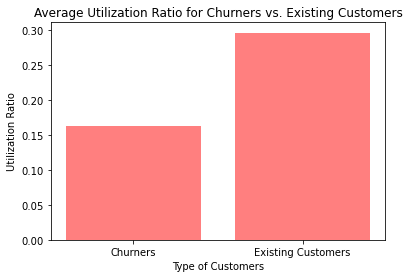

In [13]:
# Bar Graph
customers = [churner_percentage, content_percentage]
x_axis = np.arange(len(customers))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Churners", "Existing Customers"])
plt.bar(x_axis, customers, color='r', alpha=0.5, align="center")
plt.title("Average Utilization Ratio for Churners vs. Existing Customers")
plt.ylabel("Utilization Ratio")
plt.xlabel("Type of Customers")
plt.show()

In [14]:
# Does Age affect churners?
churners["Customer_Age"].value_counts()
#bins for churners
bins = [20, 29, 39, 49, 59, 100]
group_names = ["20's", "30's", "40's", "50s", "60 and over"]
churners["Age Groups"] = pd.cut(churners["Customer_Age"], bins, labels=group_names, include_lowest=False)
churners

churners_by_age = churners.groupby("Age Groups").count()
churners_by_age

<ipython-input-14-1fbbb37b5dba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churners["Age Groups"] = pd.cut(churners["Customer_Age"], bins, labels=group_names, include_lowest=False)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Age Groups,,,,,,,,,,,,,,,,,,,,,
20's,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
30's,261,261,261,261,261,261,261,261,261,261,...,261,261,261,261,261,261,261,261,261,261
40's,772,772,772,772,772,772,772,772,772,772,...,772,772,772,772,772,772,772,772,772,772
50s,506,506,506,506,506,506,506,506,506,506,...,506,506,506,506,506,506,506,506,506,506
60 and over,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71


<function matplotlib.pyplot.show(close=None, block=None)>

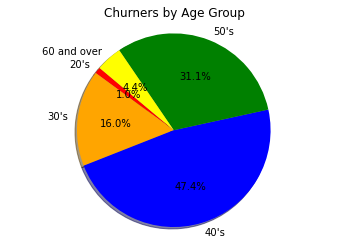

In [15]:
# Pie chart for number of churners by age
labels = ["20's", "30's", "40's", "50's","60 and over"]
sizes = [17, 261, 772, 506, 71]

colors = ["red", "orange", "blue", "green","yellow"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Churners by Age Group")
plt.axis("equal")

plt.show

In [16]:
#Looking at Churners by How Long they had their cards churners["Months_on_book"].value_counts()
churners["Months_on_book"].value_counts()

36    430
39     64
37     62
30     58
34     57
38     57
41     51
33     48
35     45
40     45
32     44
28     43
44     42
43     42
42     36
46     36
31     34
29     34
45     33
25     31
24     28
48     27
50     25
47     24
49     24
26     24
27     23
22     20
56     17
51     16
20     13
18     13
52     12
23     12
21     10
15      9
53      7
13      7
54      6
19      6
55      4
17      4
16      3
14      1
Name: Months_on_book, dtype: int64

In [17]:
churners_by_time = churners[["Months_on_book", "CLIENTNUM"]]
churners_by_time

,Months_on_book,CLIENTNUM
21,49,708508758
39,56,708300483
51,40,779471883
54,36,714374133
61,35,712030833
...,...,...
10119,47,716893683
10123,25,710638233
10124,36,716506083
10125,36,717406983


In [18]:
client_counts = churners_by_time.groupby("Months_on_book").count()
#client_counts = churners_by_time.reset_index("Months_on_book")
client_counts["index"]=client_counts.index
client_counts

,CLIENTNUM,index
Months_on_book,,
13,7,13
14,1,14
15,9,15
16,3,16
17,4,17
18,13,18
19,6,19
20,13,20
21,10,21


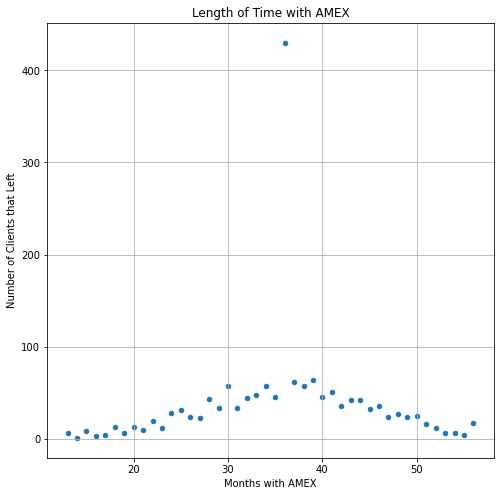

In [19]:
client_counts.plot(kind="scatter", x= "index", y="CLIENTNUM", grid=True, figsize=(8,8), title= "Length of Time with AMEX")
plt.xlabel("Months with AMEX")
plt.ylabel("Number of Clients that Left")
plt.show()